<a href="https://colab.research.google.com/github/Limteckping45/COS30019Assignment2/blob/main/CNNTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Clone the repository from the github
%cd /content
!git clone "https://github.com/Limteckping45/COS30019Assignment2"

# Pull the dataset from github to here and get their path
train_data_dir = "/content/COS30019Assignment2/training_dataset"
test_data_dir = "/content/COS30019Assignment2/testing_dataset"

/content
Cloning into 'COS30019Assignment2'...
remote: Enumerating objects: 3553, done.
remote: Counting objects: 100% (1159/1159), done.
remote: Compressing objects: 100% (1143/1143), done.
remote: Total 3553 (delta 29), reused 998 (delta 16), pack-reused 2394
Receiving objects: 100% (3553/3553), 403.29 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Updating files: 100% (3255/3255), done.


In [ ]:
# Hyper-parameter
img_width, img_height = 64, 64
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 100

In [ ]:
# Data Augmentation use for increasing the dataset size
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1920 images belonging to 12 classes.
Found 1200 images belonging to 12 classes.


In [ ]:
# CNN Model Architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) # Extract the features from the images
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # Flatten the 3D output to 1D
model.add(layers.Dropout(0.4)) #Dropout is using here for droping some data to prevent overfitting
model.add(layers.Dense(256, activation='relu')) # Dense Layer is used for classification the class by the extract features
model.add(layers.Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
# Model Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model Training
trained_model = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/100
60/60 [==============================] - 35s 491ms/step - loss: 2.4849 - accuracy: 0.0891 - val_loss: 2.4595 - val_accuracy: 0.1123
Epoch 2/100
60/60 [==============================] - 29s 482ms/step - loss: 2.4431 - accuracy: 0.1203 - val_loss: 2.3489 - val_accuracy: 0.1892
Epoch 3/100
60/60 [==============================] - 25s 422ms/step - loss: 2.3519 - accuracy: 0.1620 - val_loss: 2.2600 - val_accuracy: 0.2035
Epoch 4/100
60/60 [==============================] - 29s 486ms/step - loss: 2.3263 - accuracy: 0.1760 - val_loss: 2.2811 - val_accuracy: 0.2044
Epoch 5/100
60/60 [==============================] - 23s 391ms/step - loss: 2.2750 - accuracy: 0.2016 - val_loss: 2.1585 - val_accuracy: 0.2399
Epoch 6/100
60/60 [==============================] - 29s 483ms/step - loss: 2.2533 - accuracy: 0.2151 - val_loss: 2.2098 - val_accuracy: 0.2517
Epoch 7/100
60/60 [==============================] - 27s 461ms/step - loss: 2.1824 - accuracy: 0.2417 - val_loss: 2.1432 - val_accuracy:

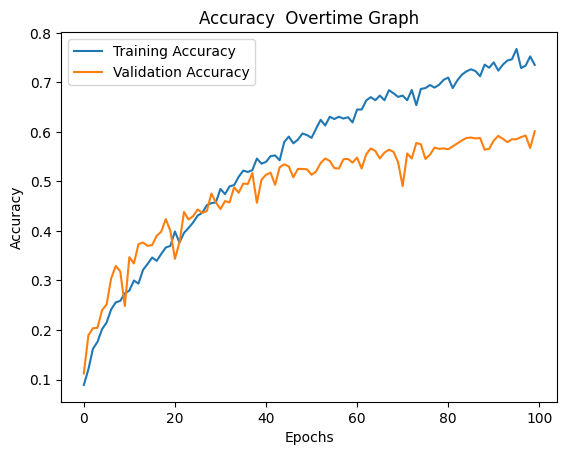

In [ ]:
import matplotlib.pyplot as plt
#Show Accuracy Overtime Graph
plt.plot(trained_model.history['accuracy'], label = 'Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy  Overtime Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

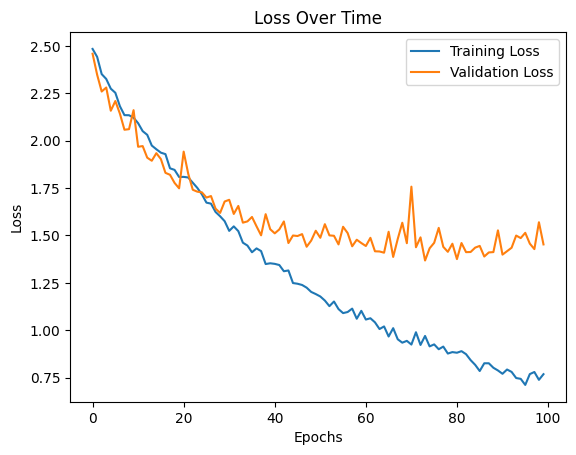

In [ ]:
#Show Loss Overtime Graph
plt.plot(trained_model.history['loss'], label = 'Training Loss')
plt.plot(trained_model.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save("CNN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Directory of the validation dataset
validation_data_dir = "/content/COS30019Assignment2/validation_dataset"

# Get class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

In [ ]:
# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale to [0, 1]
    return img_array

In [ ]:
# Function to predict class for an image
def predict_image_class(img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

1/1 [==============================] - 0s 366ms/step


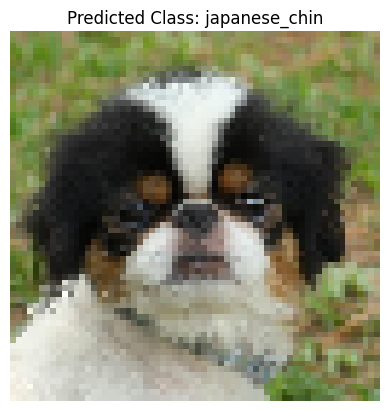

Image: 6859013.jpg, Predicted Class: japanese_chin
1/1 [==============================] - 0s 17ms/step


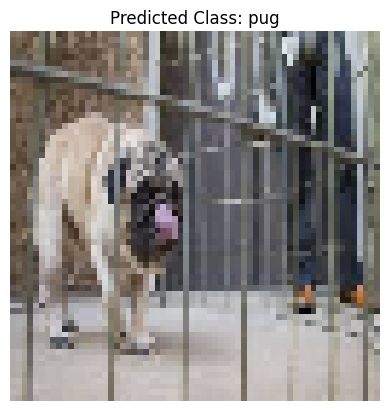

Image: images (1).jpeg, Predicted Class: pug
1/1 [==============================] - 0s 16ms/step


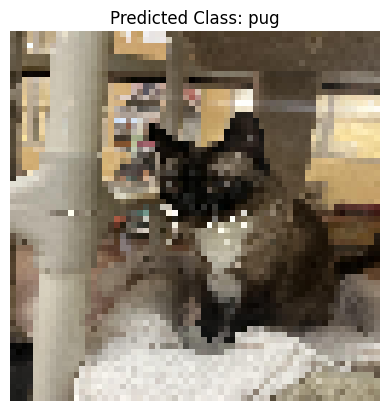

Image: so-nervous-and-excited-adopting-my-second-shelter-siamese-v0-wnfstijkk4xa1.jpg, Predicted Class: pug
1/1 [==============================] - 0s 19ms/step


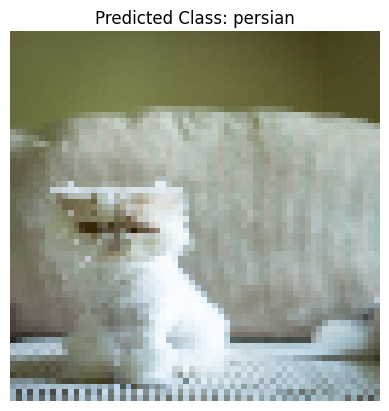

Image: 00131-683x1024.jpg, Predicted Class: persian
1/1 [==============================] - 0s 24ms/step


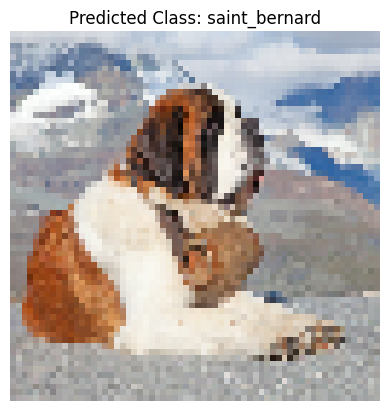

Image: bigstock_St_Bernard_Dog_with_keg_ready_26781302(1).jpg, Predicted Class: saint_bernard
1/1 [==============================] - 0s 17ms/step


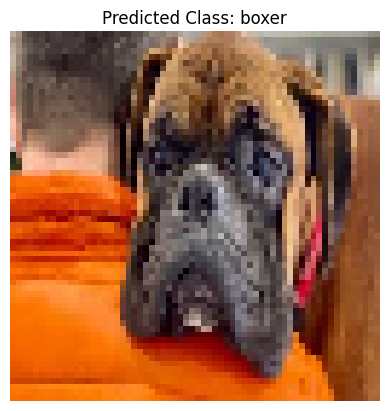

Image: images (2).jpeg, Predicted Class: boxer
1/1 [==============================] - 0s 17ms/step


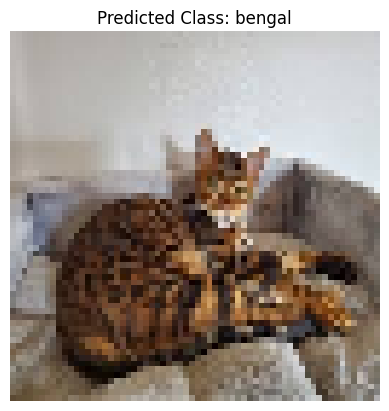

Image: images (4).jpeg, Predicted Class: bengal
1/1 [==============================] - 0s 17ms/step


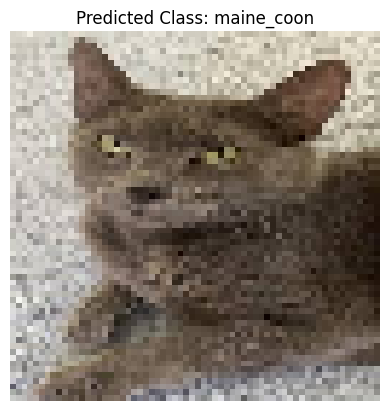

Image: images (5).jpeg, Predicted Class: maine_coon
1/1 [==============================] - 0s 16ms/step


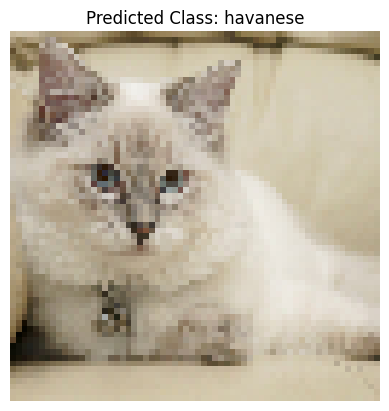

Image: Ragdoll2x.jpg, Predicted Class: havanese
1/1 [==============================] - 0s 17ms/step


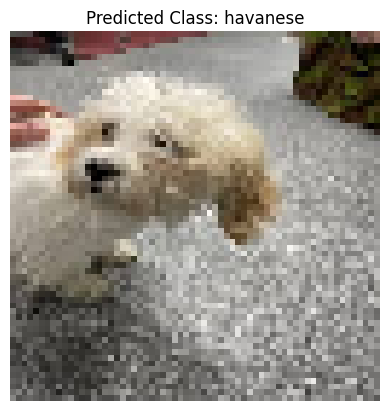

Image: images (3).jpeg, Predicted Class: havanese


In [ ]:
# Iterate over the validation dataset directory
for img_file in os.listdir(validation_data_dir):
    img_path = os.path.join(validation_data_dir, img_file)

    # Check if the file is an image
    if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        predicted_class = predict_image_class(img_path)

        # Load the image for displaying
        img = image.load_img(img_path, target_size=(img_width, img_height))

        # Display the image with its predicted class
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class}")
        plt.axis('off')  # Hide the axes
        plt.show()

        print(f"Image: {img_file}, Predicted Class: {predicted_class}")